In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import timedelta, datetime
import warnings
import evaluate
warnings.filterwarnings('ignore')

# DF with all of texas

In [11]:
#df = pd.read_csv('Mixed_Beverage_Gross_Receipts.csv')

In [12]:
#df.columns

Index(['Taxpayer Number', 'Taxpayer Name', 'Taxpayer Address', 'Taxpayer City',
       'Taxpayer State', 'Taxpayer Zip', 'Taxpayer County', 'Location Number',
       'Location Name', 'Location Address', 'Location City', 'Location State',
       'Location Zip', 'Location County', 'Inside/Outside City Limits',
       'TABC Permit Number', 'Responsibility Begin Date',
       'Responsibility End Date', 'Obligation End Date', 'Liquor Receipts',
       'Wine Receipts', 'Beer Receipts', 'Cover Charge Receipts',
       'Total Receipts'],
      dtype='object')

In [13]:
#df.dtypes

Taxpayer Number                 int64
Taxpayer Name                  object
Taxpayer Address               object
Taxpayer City                  object
Taxpayer State                 object
Taxpayer Zip                  float64
Taxpayer County                 int64
Location Number                 int64
Location Name                  object
Location Address               object
Location City                  object
Location State                 object
Location Zip                    int64
Location County                 int64
Inside/Outside City Limits     object
TABC Permit Number             object
Responsibility Begin Date      object
Responsibility End Date        object
Obligation End Date            object
Liquor Receipts                 int64
Wine Receipts                   int64
Beer Receipts                   int64
Cover Charge Receipts           int64
Total Receipts                  int64
dtype: object

In [14]:
#make column names more python friendly
#df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('/','_')

In [5]:
#check out our null values
#df.isna().sum()

taxpayer_number                     0
taxpayer_name                       0
taxpayer_address                    0
taxpayer_city                       0
taxpayer_state                   1026
taxpayer_zip                     1026
taxpayer_county                     0
location_number                     0
location_name                       0
location_address                    0
location_city                       0
location_state                      0
location_zip                        0
location_county                     0
inside_outside_city_limits          0
tabc_permit_number                  0
responsibility_begin_date           0
responsibility_end_date       1696572
obligation_end_date                 0
liquor_receipts                     0
wine_receipts                       0
beer_receipts                       0
cover_charge_receipts               0
total_receipts                      0
dtype: int64

In [15]:
#establish all the san antonio zip codes
#sa_zips = [78201,78202,78203,78204,78205,78207,78208,78209,78210,78211,78212,78213,78214,78215,78216,78217,78218,78219,78220,78221,78222,78223,78224,78225,78226,78227,78228,78229,78230,78231,78232,78233,78234,78237,78238,78239,78240,78242,78244,78245,78247,78248,78249,78250,78251,78252,78253,78254,78255,78256,78257,78258,78259,78260,78261,78263,78266]

In [16]:
#get a dataframe of just sa_zips
#df = df[df.location_zip.isin(sa_zips)]

In [9]:
#df.isna().sum()

taxpayer_number                    0
taxpayer_name                      0
taxpayer_address                   0
taxpayer_city                      0
taxpayer_state                     0
taxpayer_zip                       0
taxpayer_county                    0
location_number                    0
location_name                      0
location_address                   0
location_city                      0
location_state                     0
location_zip                       0
location_county                    0
inside_outside_city_limits         0
tabc_permit_number                 0
responsibility_begin_date          0
responsibility_end_date       122764
obligation_end_date                0
liquor_receipts                    0
wine_receipts                      0
beer_receipts                      0
cover_charge_receipts              0
total_receipts                     0
dtype: int64

In [17]:
#df.to_csv('sa_mixed_bev.csv', index=False)

# SAN ANTONIO CSV

In [2]:
df = pd.read_csv('sa_mixed_bev.csv')

In [3]:
df.shape

(198987, 24)

In [3]:
df.columns

Index(['taxpayer_number', 'taxpayer_name', 'taxpayer_address', 'taxpayer_city',
       'taxpayer_state', 'taxpayer_zip', 'taxpayer_county', 'location_number',
       'location_name', 'location_address', 'location_city', 'location_state',
       'location_zip', 'location_county', 'inside_outside_city_limits',
       'tabc_permit_number', 'responsibility_begin_date',
       'responsibility_end_date', 'obligation_end_date', 'liquor_receipts',
       'wine_receipts', 'beer_receipts', 'cover_charge_receipts',
       'total_receipts'],
      dtype='object')

In [4]:
# look at duplicates
df.duplicated().sum()

0

In [5]:
df.isna().sum()

taxpayer_number                    0
taxpayer_name                      0
taxpayer_address                   0
taxpayer_city                      0
taxpayer_state                     0
taxpayer_zip                       0
taxpayer_county                    0
location_number                    0
location_name                      0
location_address                   0
location_city                      0
location_state                     0
location_zip                       0
location_county                    0
inside_outside_city_limits         0
tabc_permit_number                 0
responsibility_begin_date          0
responsibility_end_date       122764
obligation_end_date                0
liquor_receipts                    0
wine_receipts                      0
beer_receipts                      0
cover_charge_receipts              0
total_receipts                     0
dtype: int64

In [6]:
df.dtypes

taxpayer_number                 int64
taxpayer_name                  object
taxpayer_address               object
taxpayer_city                  object
taxpayer_state                 object
taxpayer_zip                  float64
taxpayer_county                 int64
location_number                 int64
location_name                  object
location_address               object
location_city                  object
location_state                 object
location_zip                    int64
location_county                 int64
inside_outside_city_limits     object
tabc_permit_number             object
responsibility_begin_date      object
responsibility_end_date        object
obligation_end_date            object
liquor_receipts                 int64
wine_receipts                   int64
beer_receipts                   int64
cover_charge_receipts           int64
total_receipts                  int64
dtype: object

Data Prep

In [40]:
#drop unnecessary column names
df = df.drop(columns = ['taxpayer_number','taxpayer_address','taxpayer_county','location_state','tabc_permit_number', 'responsibility_end_date'])
#transfer our date time cols to date time
df.obligation_end_date = pd.to_datetime(df.obligation_end_date)
df.responsibility_begin_date = pd.to_datetime(df.responsibility_begin_date)
#transfer our zip codes to catigoricals
df.taxpayer_zip = df.taxpayer_zip.astype('O')
df.location_zip = df.location_zip.astype('O')
# Define the date threshold for 2014 tax burden change
threshold_date = pd.Timestamp('2014-01-01')

# List the columns to mulitply by tax amount
columns_to_multiply = ['liquor_receipts', 'wine_receipts', 'beer_receipts','total_receipts']

# Define the threshold date for 2014 tax change
threshold_date = pd.Timestamp('2014-01-01')

# Loop through each column in the list and apply the multiplication
for col in columns_to_multiply:
    # Create a new column name for the result
    new_col_name = col + '_in_usd'
    
    # Multiply the column values based on the 'obligation_end_date' condition
    df[new_col_name] = df[col].where(df['obligation_end_date'] < threshold_date, df[col] * 0.067)
    df[new_col_name] = df[new_col_name].where(df['obligation_end_date'] >= threshold_date, df[col] * 0.14)
# create beer ratio column
df['beer_ratio'] = (df.beer_receipts / df.total_receipts) * 100
#remove those that didn't report beer sales
df = df[df.beer_ratio.notna()]

In [8]:
df.isna().sum()

taxpayer_name                 0
taxpayer_city                 0
taxpayer_state                0
taxpayer_zip                  0
location_number               0
location_name                 0
location_address              0
location_city                 0
location_zip                  0
location_county               0
inside_outside_city_limits    0
responsibility_begin_date     0
obligation_end_date           0
liquor_receipts               0
wine_receipts                 0
beer_receipts                 0
cover_charge_receipts         0
total_receipts                0
liquor_receipts_in_usd        0
wine_receipts_in_usd          0
beer_receipts_in_usd          0
total_receipts_in_usd         0
beer_ratio                    0
dtype: int64

beer ratio first look

In [13]:
df.beer_ratio.max()

100.0

In [14]:
df.beer_ratio.min()

0.0

reporting dates included

In [8]:
df.obligation_end_date.max()

Timestamp('2023-03-31 00:00:00')

In [9]:
df.obligation_end_date.min()

Timestamp('2007-01-31 00:00:00')

In [10]:
df.columns

Index(['taxpayer_name', 'taxpayer_city', 'taxpayer_state', 'taxpayer_zip',
       'location_number', 'location_name', 'location_address', 'location_city',
       'location_zip', 'location_county', 'inside_outside_city_limits',
       'responsibility_begin_date', 'obligation_end_date', 'liquor_receipts',
       'wine_receipts', 'beer_receipts', 'cover_charge_receipts',
       'total_receipts', 'liquor_receipts_in_usd', 'wine_receipts_in_usd',
       'beer_receipts_in_usd', 'total_receipts_in_usd', 'beer_ratio'],
      dtype='object')

location exploration

In [10]:
df.location_zip.describe()

count     182025
unique        56
top        78205
freq       23538
Name: location_zip, dtype: int64

In [12]:
df.location_zip.value_counts().head()

78205    23538
78216    14338
78209    11981
78212     9120
78258     8263
Name: location_zip, dtype: int64

In [13]:
df.location_number.describe()

count   182025.00
mean        10.47
std         32.23
min          1.00
25%          1.00
50%          1.00
75%          3.00
max        439.00
Name: location_number, dtype: float64

In [14]:
df.location_number.value_counts().head()

1    104415
2     24892
3     10381
4      4916
5      3948
Name: location_number, dtype: int64

beer ratio exploration

In [15]:
df.beer_ratio.describe()

count   182025.00
mean        36.11
std         20.53
min          0.00
25%         20.82
50%         34.60
75%         49.44
max        100.00
Name: beer_ratio, dtype: float64

In [46]:
# Define the function to categorize the sales_priority
def categorize_priority(beer_ratio):
    if beer_ratio > 90:
        return 'urgent'
    elif 75 < beer_ratio <= 90:
        return 'high'
    elif 50 < beer_ratio <= 75:
        return 'mid'
    else:
        return 'low'

# Apply the categorize_priority function to the 'beer_ratio' column and create the new 'br_sales_priority' column
df['br_sales_priority'] = df['beer_ratio'].apply(categorize_priority)

In [42]:
# Updated categorize_priority function
def categorize_priority(beer_ratio):
    if beer_ratio > 55:
        return 'urgent'
    elif 50 < beer_ratio <= 55:
        return 'high'
    elif 40 < beer_ratio <= 50:
        return 'mid'
    else:
        return 'low'

# Calculate the average beer_ratio for each zip code
average_beer_ratios = df.groupby('location_zip')['beer_ratio'].mean().reset_index()

# Apply the categorize_priority function to the average beer_ratios and create the 'zip_sales_priority' column
average_beer_ratios['zip_sales_priority'] = average_beer_ratios['beer_ratio'].apply(categorize_priority)

# Merge the original DataFrame with the average_beer_ratios DataFrame to add the 'zip_sales_priority' column
df = df.merge(average_beer_ratios[['location_zip', 'zip_sales_priority']], on='location_zip', how='left')

sales priority

In [51]:
df.br_sales_priority.value_counts()

low       138145
mid        36359
high        5598
urgent      1923
Name: br_sales_priority, dtype: int64

In [52]:
df.zip_sales_priority.value_counts()

low       129583
mid        42470
high        8045
urgent      1927
Name: zip_sales_priority, dtype: int64

In [47]:
df.columns

Index(['taxpayer_name', 'taxpayer_city', 'taxpayer_state', 'taxpayer_zip',
       'location_number', 'location_name', 'location_address', 'location_city',
       'location_zip', 'location_county', 'inside_outside_city_limits',
       'responsibility_begin_date', 'obligation_end_date', 'liquor_receipts',
       'wine_receipts', 'beer_receipts', 'cover_charge_receipts',
       'total_receipts', 'liquor_receipts_in_usd', 'wine_receipts_in_usd',
       'beer_receipts_in_usd', 'total_receipts_in_usd', 'beer_ratio',
       'br_sales_priority', 'zip_sales_priority'],
      dtype='object')

In [11]:
df.sales_priority.value_counts()

low       138145
mid        36359
high        5598
urgent      1923
Name: sales_priority, dtype: int64

In [ ]:
#create priotity list
df[df.sales_priority]

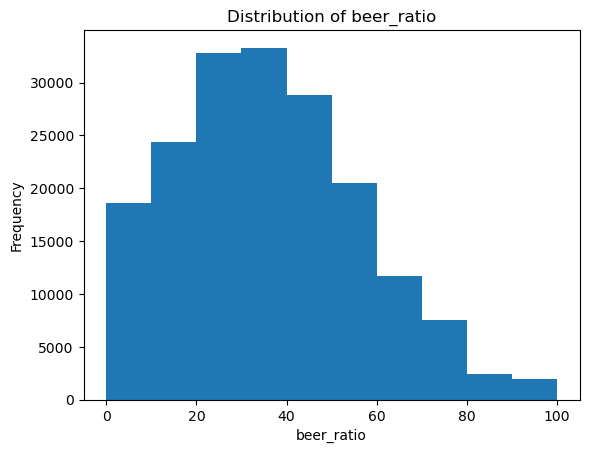

In [21]:
evaluate.show_distribution(df,'beer_ratio')

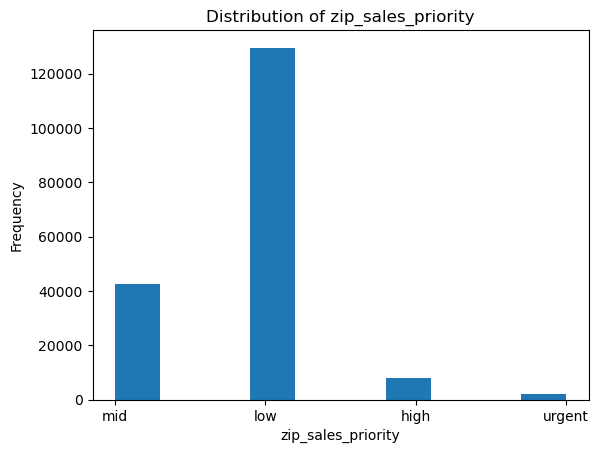

In [44]:
evaluate.show_distribution(df,'zip_sales_priority')

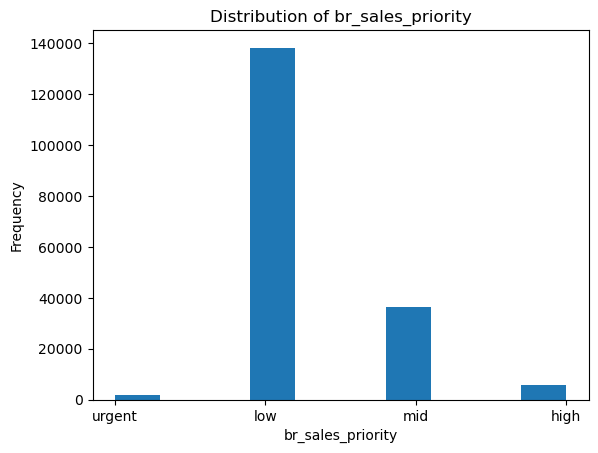

In [48]:
evaluate.show_distribution(df,'br_sales_priority')

low priority makes up a lot of the data I'm going to drop half of the lows randomly to balance our data a bit more before modeling

In [54]:
# Filter rows with low zip_sales_priority or br_sales_priority
low_priority_rows = df[(df['zip_sales_priority'] == 'low') | (df['br_sales_priority'] == 'low')]

# Calculate the number of rows to drop (60%)
num_rows_to_drop = int(0.6 * len(low_priority_rows))

# Randomly select rows to drop
rows_to_drop = low_priority_rows.sample(num_rows_to_drop, random_state=42).index

# Drop the selected rows
df = df.drop(rows_to_drop)

# To reset the index of the new DataFrame, you can use the following line:
df.reset_index(drop=True, inplace=True)

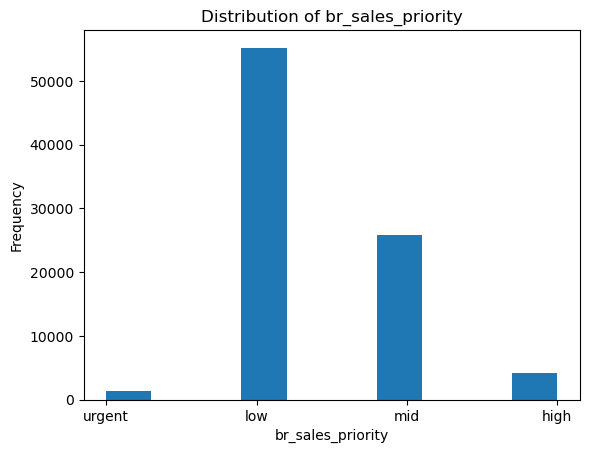

In [55]:
evaluate.show_distribution(df,'br_sales_priority')

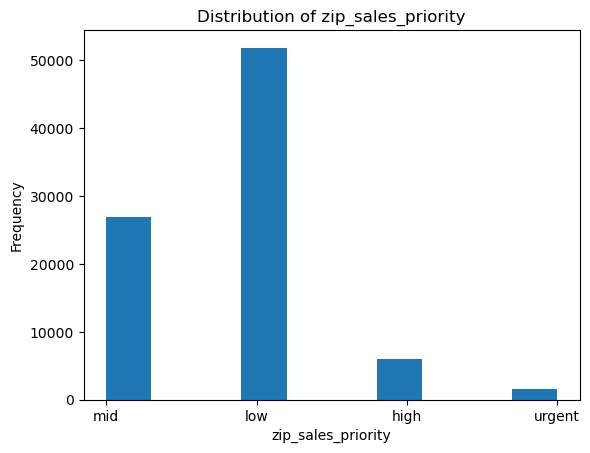

In [56]:
evaluate.show_distribution(df,'zip_sales_priority')

yeah thats more like it. lets save this df as csv

In [57]:
#df.to_csv('edited_sa_mixed_bev.csv')

In [9]:
df = df.set_index('obligation_end_date').sort_index()

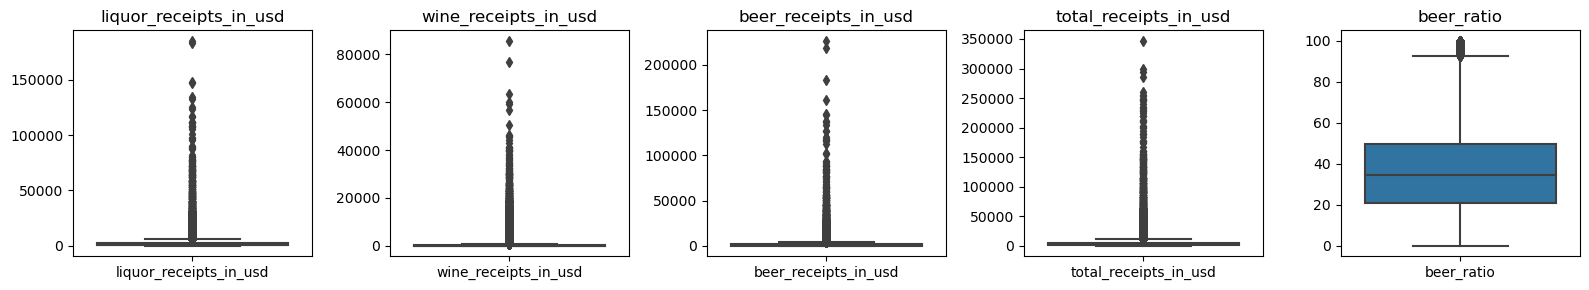

In [50]:
evaluate.get_box(df)

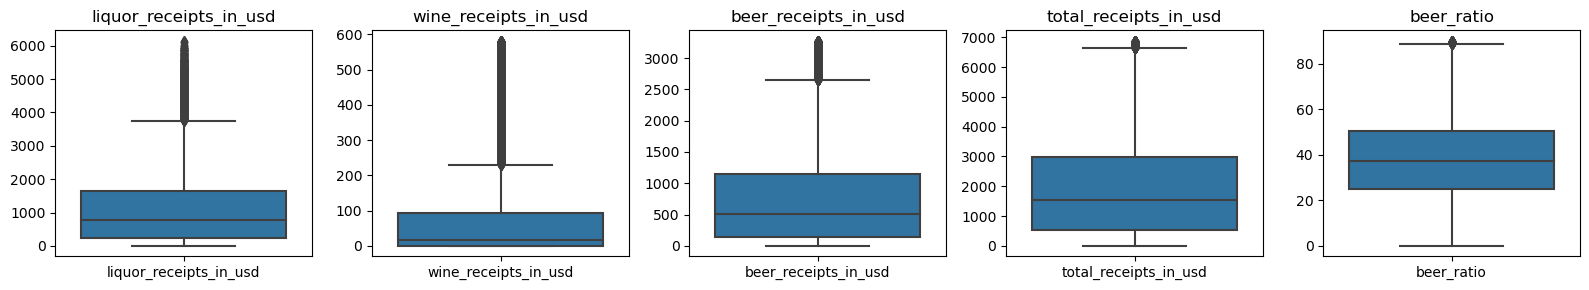

In [4]:
#just doing this to get a better look at averages,  the ourliers are pretty crazy in this data
df = evaluate.remove_outliers(df,k=1.5,col_list=['liquor_receipts_in_usd', 'wine_receipts_in_usd',
       'beer_receipts_in_usd', 'total_receipts_in_usd', 'beer_ratio'])
evaluate.get_box(df)

getting ready for tsa modeling

In [15]:
# Filter rows with obligation_end_date in 2021 and 2022
filtered_df = df[(df['obligation_end_date'].dt.year == 2021) | (df['obligation_end_date'].dt.year == 2022)]

# To reset the index of the new DataFrame, you can use the following line:
filtered_df.reset_index(drop=True, inplace=True)

In [16]:
filtered_df.isna().sum()

taxpayer_name                 0
taxpayer_city                 0
taxpayer_state                0
taxpayer_zip                  0
location_number               0
location_name                 0
location_address              0
location_city                 0
location_zip                  0
location_county               0
inside_outside_city_limits    0
responsibility_begin_date     0
obligation_end_date           0
liquor_receipts               0
wine_receipts                 0
beer_receipts                 0
cover_charge_receipts         0
total_receipts                0
liquor_receipts_in_usd        0
wine_receipts_in_usd          0
beer_receipts_in_usd          0
total_receipts_in_usd         0
beer_ratio                    0
dtype: int64

In [17]:
filtered_df = filtered_df.set_index('obligation_end_date').sort_index()

In [18]:
filtered_df

,taxpayer_name,taxpayer_city,taxpayer_state,taxpayer_zip,location_number,location_name,location_address,location_city,location_zip,location_county,...,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts,liquor_receipts_in_usd,wine_receipts_in_usd,beer_receipts_in_usd,total_receipts_in_usd,beer_ratio
obligation_end_date,,,,,,,,,,,,,,,,,,,,,
2021-01-31,"UNTITLED, LLC",AUSTIN,TX,78731.0,2,HOPSCOTCH,711 NAVARRO ST STE 100,SAN ANTONIO,78205,15,...,10997,648,1276,0,12921,736.799,43.416,85.492,865.707,9.875397
2021-01-31,BARS R US INC.,SAN ANTONIO,TX,78216.0,1,THIRSTY TURTLE,1626 NE LOOP 410,SAN ANTONIO,78209,15,...,27522,8,15459,0,42989,1843.974,0.536,1035.753,2880.263,35.960362
2021-01-31,"SANTIKOS BEVERAGES, LLC",SAN ANTONIO,TX,78249.0,5,SANTIKOS MAYAN PALACE,1918 SW MILITARY DR,SAN ANTONIO,78221,15,...,2770,360,2393,0,5523,185.590,24.120,160.331,370.041,43.327902
2021-01-31,"HEB BEVERAGE COMPANY, LLC",SAN ANTONIO,TX,78283.0,439,HEB TRUE TEXAS BBQ (658),23635 WILDERNESS OAK,SAN ANTONIO,78258,15,...,6238,1064,4813,0,12115,417.946,71.288,322.471,811.705,39.727610
2021-01-31,SANANTONIO CONNALLY LLC,AUSTIN,TX,78709.0,1,JOHNNY CARINOS,231 SW LOOP 410,SAN ANTONIO,78245,15,...,4860,1632,4447,0,10939,325.620,109.344,297.949,732.913,40.652710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,POTBELLY STOVE LLC,SAN ANTONIO,TX,78250.0,4,SMASHIN CRAB,11975 ALAMO RANCH PKWY STE 110,SAN ANTONIO,78253,15,...,11077,212,5349,0,16638,742.159,14.204,358.383,1114.746,32.149297
2022-12-31,"THE FRUTERIA Y BOTANERO, LLC",SAN ANTONIO,TX,78204.0,1,THE FRUTERIA,1401 S FLORES ST # 102,SAN ANTONIO,78204,15,...,22284,671,1499,0,24454,1493.028,44.957,100.433,1638.418,6.129877
2022-12-31,"FRAC CLEAN, LLC",BOERNE,TX,78015.0,2,TREE HOUSE,7905 BANDERA RD # C,SAN ANTONIO,78250,15,...,29027,78,24034,0,53139,1944.809,5.226,1610.278,3560.313,45.228552


In [26]:
df.resample('D')

In [28]:
df = df.dropna()

In [27]:
df.isna().sum()

taxpayer_name                      0
taxpayer_city                      0
taxpayer_state                     0
taxpayer_zip                       0
location_number                    0
location_name                      0
location_address                   0
location_city                      0
location_zip                       0
location_county                    0
inside_outside_city_limits         0
responsibility_begin_date          0
responsibility_end_date       122764
liquor_receipts                    0
wine_receipts                      0
beer_receipts                      0
cover_charge_receipts              0
total_receipts                     0
dtype: int64

In [30]:
df.shape

(2947222, 23)

In [33]:
df.inside_outside_city_limits.value_counts()

Y    2715702
N     231520
Name: inside_outside_city_limits, dtype: int64

In [35]:
df.head()

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,location_county,inside_outside_city_limits,tabc_permit_number,responsibility_begin_date,obligation_end_date,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts
0,32047970895,HONDURAS MAYA CAFE & BAR LLC,8011 HAZEN ST,HOUSTON,TX,77036.0,101,1,HONDURAS MAYA CAFE & BAR LLC,5945 BELLAIRE BLVD STE B,...,101,Y,MB817033,08/16/2012,07/31/2019,0,0,0,0,0
1,32049923835,"MERMAID KARAOKE PRIVATE CLUB, INC.",2639 WALNUT HILL LN STE 225,DALLAS,TX,75229.0,57,1,MERMAID KARAOKE PRIVATE CLUB,1310 W CAMPBELL RD STE 103,...,57,Y,N 837378,04/12/2013,08/31/2014,480,185,1374,0,2039
2,32034036304,FENG KAI CORPORATION,8427 BOULEVARD 26,N RICHLND HLS,TX,76180.0,220,1,JAPANESE GRILL,8427 BOULEVARD 26,...,220,Y,MB576670,05/01/2008,06/30/2016,1143,167,669,0,1979
3,14537211071,"THE HUTTO SMITHS, LLC",429 LITTLE LAKE RD,HUTTO,TX,78634.0,246,1,THE DOWNTOWN HALL OF FAME,205 EAST ST,...,246,Y,MB791778,12/06/2011,03/31/2018,12881,357,10447,0,23685
4,32019999229,"THE CROSSING AT FIDDLE CREEK, INC.",1620 W CEDAR ST,STEPHENVILLE,TX,76401.0,72,1,THE CROSSING AT FIDDLE CREEK INC,2004 W SWAN ST,...,72,Y,N 643163,10/26/2006,08/31/2008,4841,2413,4620,0,11874


In [38]:
df[df.taxpayer_city == 'SAN ANTONIO']

,taxpayer_number,taxpayer_name,taxpayer_address,taxpayer_city,taxpayer_state,taxpayer_zip,taxpayer_county,location_number,location_name,location_address,...,location_county,inside_outside_city_limits,tabc_permit_number,responsibility_begin_date,obligation_end_date,liquor_receipts,wine_receipts,beer_receipts,cover_charge_receipts,total_receipts
35,17428720902,MANDO'S RIVER SEAFOOD RESTAURANT INC,2610 JOHNSON GRASS,SAN ANTONIO,TX,78251.0,15,2,MANDO'S RIVER SEAFOOD RESTAURANT INC,2918 W COMMERCE ST,...,15,Y,MB650751,02/06/2007,06/30/2022,111,0,2304,0,2415
96,32049153466,JAMAICA JAMAICA CUISINE LLC,2026 AUSTIN HWY,SAN ANTONIO,TX,78218.0,15,3,JAMAICA JAMAICA CUISINE,6909 N LOOP 1604 E STE VC09A,...,15,Y,MB1083222,03/09/2020,04/30/2020,0,0,0,0,0
191,17422892665,"ORIGINAL CADILLAC BAR OF NUEVO LAREDO, INC.",20 WORTHSHAM DR,SAN ANTONIO,TX,78257.0,15,1,ORIGINAL CADILLAC BAR OF NUEVO LAREDO INC,212 S FLORES ST,...,15,Y,MB159568,11/30/1993,07/31/2010,28094,378,33238,0,61710
242,17426545970,"CB RESTAURANTS, INC.",9510 TIOGA DR STE 102,SAN ANTONIO,TX,78230.0,15,1,SUGARS,2731 NW LOOP 410,...,15,Y,MB437968,02/01/2001,10/31/2015,164240,3169,100933,0,268342
245,32008170998,JOHN WAYNE DOWNUM,PO BOX 15858,SAN ANTONIO,TX,78212.0,15,2,THE ANNEX,330 SAN PEDRO AVE,...,15,Y,MB409424,03/21/1997,10/31/2013,35051,439,17515,0,53005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947949,32037887364,"LD LIFT, INC.",101 PEREIDA ST,SAN ANTONIO,TX,78210.0,15,1,SOUTHTOWN 101,101 PEREIDA ST,...,15,Y,MB814536,07/25/2012,12/31/2022,42483,683,30851,0,74017
2948125,18106032016,CLUB SIRIUS LLC,228 LOSOYA ST,SAN ANTONIO,TX,78205.0,15,1,CLUB SIRIUS,228 LOSOYA ST,...,15,Y,MB544584,11/03/2003,12/31/2022,31394,12,12808,0,44214
2948172,10437598153,"LA HACIENDA DE LOS BARRIOS, LTD.",18747 REDLAND RD,SAN ANTONIO,TX,78259.0,15,1,LA HACIENDA DE LOS BARRIOS,18747 REDLAND RD,...,15,Y,MB560372,07/05/2004,12/31/2022,67646,3234,13204,0,84084
2948220,32047911139,"HARWOOD-COOK, LIMITED LIABILITY COMPANY",PO BOX 6834,SAN ANTONIO,TX,78209.0,15,2,THE S.A. COUNTRY SALOON,1134 W HILDEBRAND AVE,...,15,Y,MB818839,02/01/2021,12/31/2022,18092,79,9441,0,27612
